# **Configurações**

Para melhor manusear o código, sem precisar ficar olhando cada célula ao executar, é criado uma classe para manter configurações gerais do código.

In [ ]:
class Config:
    DROP_AND_FILL_NULL = True

    BALANCE_DATA = False
    
    SHUFFLE_DATA = True
    SHUFFLE_CONFIG = {
        'random_state': 26
    }

    DROP_OUTLIERS = False
    DROP_OUTLIERS_CONFIG = {
        'columns': ['vlr_saldo', 'vlr_credito', 'num_atend_atrs', 'num_produtos', 'num_atend', 'qtd_oper', 'qtd_reclm', 'qtd_restr']
    }

    TRAIN_TEST_SPLIT_CONFIG = {
        'test_size': 0.25,
        'random_state': 42
    }

# **Bibliotecas**

## Pacotes nativos:

Primeiramente, é preciso instalar as bibliotecas necessárias para o funcionamento dos processos realizados.

Os pacotes Pandas e Numpy são de uso fundamental em Python e serão utilizados na análise exploratória dos dados, bem como em sua posterior limpeza e tratamento. Scikit-Learn, por outro lado, é uma biblioteca Python aplicada a Machine Learning, e suas ferramentas serão essenciais para o desenvolvovimento do modelo preditivo. Já o pacote matplotlib será utilizado para a visualização dos dados geração de gráficos.

As bibliotecas citadas anteriormente são nativas do Google Colab, e não precisam ser instaladas, como pode ser visto ao utilizar o comando abaixo para buscar os pacotes instalados no ambiente de execução.

In [ ]:
'''
O pip, gerenciador de pacotes do python, gera uma lista de pacotes instalados,
com essa lista, utiliza-se a ferramenta grep ( presente nas distribuições linux, incluido no colab) para filtrar os pacotes.
Temos como resultado uma lista de versões dos pacotes encontrado no ambiente virtual com base no filtro de pesquisa.
'''
!pip list -v | grep -E 'numpy|pandas|sklearn|matplotlib'

matplotlib                    3.2.2                        /usr/local/lib/python3.7/dist-packages pip
matplotlib-venn               0.11.7                       /usr/local/lib/python3.7/dist-packages pip
numpy                         1.21.6                       /usr/local/lib/python3.7/dist-packages pip
pandas                        1.3.5                        /usr/local/lib/python3.7/dist-packages pip
pandas-datareader             0.9.0                        /usr/local/lib/python3.7/dist-packages pip
pandas-gbq                    0.13.3                       /usr/local/lib/python3.7/dist-packages pip
pandas-profiling              1.4.1                        /usr/local/lib/python3.7/dist-packages pip
sklearn-pandas                1.8.0                        /usr/local/lib/python3.7/dist-packages pip


## Pacotes a serem instalados manualmente:

Outras bibliotecas necessárias para funcionamento do projeto, são o PyDrive, que permite a conexão com o Google Drive, e o pycaret, que é uma biblioteca de Machine Learning que facilita a construção de modelos preditivos com poucas atuações de código.
Porém esses pacotes apontados acima não são nativos do Google Colab, e precisam ser instalados. Para isso, basta executar o comando abaixo.
Não só isso, mas por uma exigência do **numba**, devemos instalar exatamente a versão mais recente, pois ele aceita a versão _1.21.6_ do **numpy**

In [ ]:
'''
O gerenciador pip, instala os pacotes no ambiente virtual, para que possam ser utilizados no código.
São usados os argumentos:
	-q: quiet, não exibe a saída do comando no terminal para não poluir a saída do notebook.
'''

%pip install -q PyDrive pycaret
%pip install -U numba

     |████████████████████████████████| 320 kB 16.9 MB/s 
     |████████████████████████████████| 1.3 MB 54.7 MB/s 
     |████████████████████████████████| 2.0 MB 70.9 MB/s 
     |████████████████████████████████| 268 kB 53.3 MB/s 
     |████████████████████████████████| 167 kB 78.2 MB/s 
     |████████████████████████████████| 3.3 MB 39.8 MB/s 
     |████████████████████████████████| 10.4 MB 36.1 MB/s 
     |████████████████████████████████| 16.9 MB 689 kB/s 
     |████████████████████████████████| 636 kB 48.0 MB/s 
     |████████████████████████████████| 6.8 MB 17.6 MB/s 
     |████████████████████████████████| 88 kB 4.5 MB/s 
     |████████████████████████████████| 25.9 MB 55.2 MB/s 
     |████████████████████████████████| 137 kB 50.0 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 1.7 MB 32.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
 

_É normal que após instalação, seja necessário a reinicialização da máquina virtual para aplicar as alterações!_

## Importando bibliotecas:

Neste processo é feito a importação das bibliotecas usadas de modo geral durante a execução do projeto.

In [ ]:
'''
Importa as bibliotecas pandas e numpy para manipulação de dados e matemática respectivamente.
São utilizadas diretivas de importação para facilitar a leitura do código.
- np é um alias para numpy
- pd é um alias para pandas.
'''
import pandas as pd
import numpy as np


'''
Importa as bibliotecas necessárias para autenticação no google drive e download dos arquivos de dados.
O Colab contém bibliotecas para autenticação no google drive, para que possamos acessar os arquivos de dados.
Já o PyDrive facilita a manipulação dos arquivos no google drive.
'''
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive


### --------------------------------------------------------------------------------
##Importa as bibliotecas necessárias para a criação do modelo de machine learning.

# Sklearn que contém algoritmos de aprendizado supervisionado e não supervisionado para classificação, regressão e clustering.
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Pycaret que automatiza o processo de criação de modelos de machine learning.
import pycaret
from pycaret.classification import compare_models
from pycaret import classification

### --------------------------------------------------------------------------------


# Importação da biblioteca Plotly, que cria gráficos interativos para a visualização dos dados
import plotly.express as px


# Importação da biblioteca Matplotlib e alguns módulos do sklearn, que cria gráficos estáticos para a visualização dos dados
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


# Remove warnings durante a execução do código, para facilitar a leitura do notebook e evitar poluição da saída.
import warnings
warnings.filterwarnings('ignore')

# **Carregando dados**

## Acessando dados no Google Drive e importando para o Colab
Neste passo, é necessário autenticar o Colab no Google Drive para que possamos acessar os arquivos de dados e importá-los para o ambiente virtual do Colab.

In [ ]:
# Permite o acesso a conta google do usuário para autenticação no google drive.
auth.authenticate_user()
gauth = GoogleAuth()

# Autentica o usuário no google drive.
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Agora devemos fazer o download dos dados do Google Drive para a máquina virtual do Colab.

In [ ]:
# Download dos dados para esta máquina virtual
downloaded = drive.CreateFile({'id': '1DUV-TOm5NhiaDfBgewwh26Ky7jgoC1mU'})
downloaded.GetContentFile('data.csv')

## Importando os dados para um Dataframe


Com os dados devidamentes alocados na máquina, conseguimos fazer a leitura dos mesmos e armazená-los em um DataFrame.

In [ ]:
# Carregamento dos dados baixados em um dataframe
df = pd.read_csv('data.csv')

# Verificando o dataframe
df

,anomes,num_cpf_hash,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,cod_rating,ind_atrito,ind_engaj,ind_novo_cli
0,202104,fffff8b0db8eff291be8b83f8885f52c52782bb42c3c4b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,202104,ffffd54b45ec46113523184fc07185a0d5cbfa876a07ba...,35943.74,5815.50,NaN,377.0,1.0,NaN,24.0,NaN,10.0,NaN,A,NaN,1.0,NaN
2,202104,ffffd47a92b3e4291c013033ae528708a19eaede50f78e...,6288.22,NaN,NaN,257.0,NaN,NaN,22.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN
3,202104,ffffc102ddd37ec29e985a4564e85a2bace79a85ebff5e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,202104,ffffbd4a3d42a12e07b1202d68c33d43220c42c8a55160...,1238.93,1400.00,NaN,773.0,2.0,NaN,21.0,NaN,NaN,NaN,A,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12032488,202204,000055dd71d2394bf27d4fb46f4e8a91ba90a604774953...,970.18,NaN,NaN,415.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12032489,202204,00003a6cf049e4fe3416c1a55d1fc1aac613956ecd5d7a...,0.00,NaN,NaN,689.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12032490,202204,000038baed6e8076adec7272523211faaec7bf8b30b1e1...,30268.92,1631.88,NaN,359.0,1.0,NaN,17.0,NaN,6.0,NaN,A,NaN,1.0,NaN
12032491,202204,00003671431c71ae1a84ec138b63c7a6e465f9616af5ea...,NaN,NaN,NaN,373.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0


# **Limpeza dos dados**

## **Limpeza dos dados - parte 1**


Analizando dados de correlação da coluna principal, **ind_atrito**. Assim podemos determinar as mais relacionadas com sua mudança.

* Em primeiro lugar, é necessário retirar as linhas que não possuem cod_rating (parâmetro utilizado internamente pelo banco para classificar seus clientes), a fim de facilitar o aprendizado do modelo preditivo, visto que, se não há registro de cod_rating, a linha não pertence, necessariamente, a um cliente do banco.

* Após a resolução desse primeiro empecilho, todos os valores nulos das colunas "num_atend", "num_atend_atrs", "qtd_reclm", "qtd_restr", "ind_atrito", "ind_engaj", "ind_novo_client" e "vlr_score" foram trocados para o valor zero (0), porque o modelo preditivo não consegue identificar, tampouco manipular dados diferentes de números.

* Finalizando essa primeira parte, mudamos os parâmetros do cod_rating de letras (A, B, C, D, E, F, G, H e HH) para números (0, 1, 2, 3, 4, 5, 6, 7, 8 e 9, respectivamente)

In [ ]:
if Config.DROP_AND_FILL_NULL:
	import re

	# Grava o número de linhas antes da limpeza
	print('Número de linhas antes da limpeza: ', df.shape[0])

	#Pega todas as linhas que possuem cod_rating diferente de Nulo
	df = df[~df.cod_rating.isnull()]

	# Verificando o dataframe
	print('Número de linhas removendo as linhas com cod_rating nulo: ', df.shape[0])


	# Substitui todos os nulos por 0 nas colunas de interesse
	columns_to_fill_nan = ['num_atend', 'num_atend_atrs', 'qtd_reclm', 'qtd_restr', 'ind_atrito', 'ind_engaj', 'ind_novo_cli', 'vlr_score', 'num_produtos']
	df[columns_to_fill_nan] = df[columns_to_fill_nan].fillna(0)

	# Faz o teste de consistência verificando se existem valores nulos
	assert df[columns_to_fill_nan].isnull().sum().sum() == 0, 'Existem valores nulos nas colunas de interesse'

	# Verificando o dataframe
	print('Número de linhas substituindo as linhas com valores nulos: ', df.shape[0])

	#Transformas o cod_rating de letras para números. Ordem alfabetica
	'''
	A -> 1
	B -> 2
	...
	'''
	le = LabelEncoder()
	df['cod_rating'] = le.fit_transform(df['cod_rating'])

	# Faz o teste de consistência verificando se foi substituído todas as letras por números na coluna cod_rating
	# Utiliza expressão regular para verificar se existe algum valor que não seja um número
	# assert re.search('[a-zA-Z]', df['cod_rating'].astype(str).sum()) == None, 'Existem letras na coluna cod_rating'

	# Verificando o dataframe após a transformação
	df.head()

Número de linhas antes da limpeza:  12032493
Número de linhas removendo as linhas com cod_rating nulo:  6186773
Número de linhas substituindo as linhas com valores nulos:  6186773


In [ ]:
# Verificando os dados que mais influenciam no resultado do tier

# Gerando a matriz de correlação 
matrix_corr = df.corr().style.background_gradient(cmap='coolwarm')

# Selecionando a matriz de correlação apenas com os valores do tier
matrix_target = matrix_corr.data.ind_atrito.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')

# Mostrando a matriz de correlação
matrix_target

,ind_atrito
ind_atrito,1.000000
qtd_reclm,0.527522
num_atend,0.032219
num_atend_atrs,0.020750
ind_engaj,0.008666
vlr_credito,0.006628
num_produtos,0.005608
cod_rating,0.005100
qtd_oper,0.004648
vlr_score,0.004195


## **Limpeza dos dados - parte 2**

* Nessa etapa, aquelas linhas que possuem valor de crédito e saldo como **nulos** foram retiradas, devido ao fato de que há uma alta probabilidade de que essas possoas não possuam conta no Banco Pan. 

* Posteriormente, a partir de uma verificação, foi percebida a existência de linhas que, apesar de possuirem valores concretos de score, valor de saldo, crédito, número de atendimentos, etc. não possuem informações na coluna **renda**. Dessa forma, a fim de potencializar o funcionamento do modelo preditivo, após perceber a irrelevância dessa coluna para a construção desse, foi decidida a sua retirada da tabela. Além dela, foi excluída, também, a coluna que continha o cpf, visto que, por ter sofrido um processo de hash, possuia letras em sua composição e não era compreendido pela predição. 

In [ ]:
if Config.DROP_AND_FILL_NULL:
	# Retirada de todos os valores de crédito e saldo que estão nulos
	df = df[~df.vlr_credito.isnull() & ~df.vlr_saldo.isnull()]

# Exclusão das colunas renda e cpf
df = df.drop('vlr_renda', axis=1)
df = df.drop('num_cpf_hash', axis=1)

# Verificação das mudanças realizadas:
df.head()

,anomes,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,cod_rating,ind_atrito,ind_engaj,ind_novo_cli
1,202104,35943.74,5815.50,0.0,377.0,1.0,0.0,24.0,0.0,10.0,0,0.0,1.0,0.0
4,202104,1238.93,1400.00,0.0,773.0,2.0,0.0,21.0,0.0,0.0,0,0.0,1.0,0.0
7,202104,12607.75,31.70,0.0,0.0,0.0,0.0,9.0,0.0,0.0,9,0.0,0.0,0.0
8,202104,81506.54,5243.45,0.0,560.0,1.0,0.0,14.0,0.0,0.0,0,0.0,0.0,0.0
9,202104,112918.62,7252.64,0.0,374.0,2.0,0.0,23.0,0.0,0.0,0,0.0,1.0,0.0


## Seleção de dados
 
Após a de limpeza dos dados ausentes e dos dados nulos, foram definidas quais features serão utilizadas na construção do modelo preditivo. Para fazer tal escolha, os atributos relevantes no processo de análise da conduta de um cliente do Banco PAN foram considerados.
 
• **Safra (“anomes”)** --> Ao analisar a safra (ano e mês), consegue-se observar o comportamento do cliente ao longo do tempo e estimar seu comportamento futuro.
 
• **Valor de crédito (“vlr_credito”)** --> O valor de crédito apresenta a situação do cliente no mercado quando esse declara seu valor total de crédito, sendo um indicador de possíveis atritos entre cliente e banco, bem como um possível indicador de novos clientes ou clientes que possam ter a intenção de adquirir novos produtos.
 
• **Valor de saldo (“vlr_saldo”)** --> O valor total de saldo do cliente é uma coluna que, a depender do valor (mais baixo ou mais alto), poderá indicar a existência de atrito na relação que será predita pelo modelo. 
    
• **Número de atendimentos (“num_atend” e “num_atend_atrs”)** --> O número total de atendimentos e o número de atendimentos atrasados é um dos principais indicativos de atrito de um cliente com o Banco Pan.
    
• **Valor do score (“vlr_score”)**  --> O valor do score no Serasa de um cliente é capaz de identificar a necessidade do cliente de adquirir, por exemplo, certo valor de crédito no banco.
 
• **Número de produtos (“num_produtos”)** --> Quanto maior o número de serviços aderidos, maior pode ser o nível de atrito com a instituição, considerando a preferência pelo Banco PAN quanto a esses serviços.
 
• **Quantidade de operações (“qtd_oper”)** --> Quando um cliente possui muitas operações referentes a um mesmo serviço, deve ser considerada a preferência pelo Banco PAN, quando comparado a outras instituições financeiras.
 
• **Quantidade de reclamações (“qtd_reclm”)** --> Se um cliente possui muitas reclamações, ele se sente insatisfeito com os serviços oferecidos pela instituição em questão. 
 
• **Quantidade de restritivos no mercado (“qtd_restr”)** --> Considera as restrições financeiras do cliente em outras companhias.

• **Rating do cliente (“cod_rating”)** --> Refere-se ao risco que o cliente representa para o banco, indicando se existem atritos nessa relação ou se é provável que o cliente adquira novos produtos na instituição.
 
• **Índice de atrito (“ind_atritado”)** --> É uma métrica interna do banco que quantifica possíveis conflitos entre o Banco PAN e seus clientes. Se esse índice for diferente de zero, está claro que o cliente possui conflitos com o banco.
 
• **Índice de engajamento (“ind_engajado”)** --> Reflete o quão engajado o cliente é com a instituição, auxiliando o modelo preditivo a analisar se é alta ou baixa a probabilidade de que o cliente contate o banco para adquirir novos produtos ou serviços.
 
• **Índice de identificação de novo cliente (“ind_novo_cliente”)** --> Identifica potenciais clientes do Banco PAN, os quais serão identificados ao entrarem em contato com o atendimento da instituição, de modo que a intenção de abrir uma conta no banco seja predita pelo modelo preditivo.
 
Por fim, foram definidos os campos que não serão utilizados na construção da lógica do modelo preditivo, os quais encontram-se dispostos abaixo.
 
• **Número do CPF (“num_cpf”)** --> Os clientes não serão avaliados individualmente porque o modelo preditivo irá considerar um conjunto de clientes. Além disso, os clientes devem ser mantidos anônimos e os valores deste campo são strings, não sendo reconhecidos pelo modelo. 
 
• **Valor da renda (“vlr_renda")** --> A maioria dos valores para esse campo são nulos (NaN), não havendo uma quantidade suficiente de registros para que o atributo em questão influencie as predições realizadas.

# **Tratamento dos dados**

## Balanceando

Abaixo, está sendo realizado o tratamento dos dados, no qual é selecionada a base de dados limpa e, a partir dela, criada uma proporção entre clientes atritados e não atritados. Isso é feito porque, nos dados fornecidos, existe um volume muito elevado de clientes não atritados quando comparado ao número de clientes atritados, o que induzirá o modelo ao erro. 

In [ ]:
if Config.BALANCE_DATA:
	# Defino um novo daraframe somente com os clientes atritados
	angry_clients = df[(df.ind_atrito == 1)]

	# Multiplico o tamanho do DataFrame de clientes atritados por 1.4 para balancear a quantidade de atritados e não atitados
	length_to_balence = int(len(angry_clients) * 1.4)#1.4: valor definido manualmente por testes

	# Pegamos um novo DataFrame somente com clientes não atritados, pegando somente a quantidade anteriormente definida
	not_angry_clients = df[(df.ind_atrito == 0)].head(length_to_balence)

	# Concateno os dataframes de não atritados e atritados, ficando assim balanceado e não enviesando o modelo
	frames = [angry_clients, not_angry_clients]
	df = pd.concat(frames)

if Config.SHUFFLE_DATA:
	# Misturando os dados para que não fiquem ordenados por atritados e não atritados.
	# O random_state é para garantir que a amostra seja sempre a mesma.
	df = df.sample(frac = 1, random_state = Config.SHUFFLE_CONFIG['random_state'])

if Config.BALANCE_DATA or Config.SHUFFLE_DATA:
	# Verificando o dataframe
	df.head()

## **Tratamento de dados - parte 2**

* Agora, com os nulos tratados, confere-se a existência de algum dado no data frame que permaneça nulo, a fim de corrirgir caso o resultado seja diferente de zero. 

# **Normalização e padronização dos dados**



A normalização precisa ser feita após a realização da separação de treinamento e teste. Após essa etapa, é preciso realizar a normalização apenas no conjunto de treinamento para que, posteriormente, ela seja aplicada no conjunto de teste. 
* Fit: Treinamento
* Transformação: treinamento e teste

### Remoção de extremos:
Para normalizar os dados, em alguns casos é necessário remover os dados de extremos, pois eles podem distorcer a normalização. Para isso, é utilizado a classe de Outliers criada abaixo:

In [ ]:
# Cria a classe que remove outliers do dataframe
class Outliers:
    def __init__(self, df) -> None:
        self.df = df

    # Método que remove os outliers do dataframe
    def remove_outliers(self, columns_to_remove_outliers: list) -> pd.DataFrame:
        # Itera sobre as colunas de interesse
        for column in columns_to_remove_outliers:
            quantile_value = Config.DROP_OUTLIERS_CONFIG['percentile'] / 100
            # Calcula o valor do primeiro quartil
            Q1 = self.df[column].quantile(quantile_value)
            # Calcula o valor do terceiro quartil
            Q3 = self.df[column].quantile(1 - quantile_value)

            # Calcula o valor do intervalo interquartil
            IQR = Q3 - Q1

            # Calcula o valor mínimo
            minimum = Q1 - (IQR * 1.5)

            # Calcula o valor máximo
            maximum = Q3 + (IQR * 1.5)

            # Remove os outliers
            self.df = self.df[(self.df[column] >= minimum) & (self.df[column] <= maximum)]

        # Retorna o dataframe sem os outliers
        return self.df

In [ ]:
if Config.DROP_OUTLIERS:
	# Instancia a classe que remove outliers
	outliers = Outliers(df)

	# Remove os outliers
	df = outliers.remove_outliers(Config.DROP_OUTLIERS_CONFIG['columns'])

	# Verificando o dataframe
	df.head()

### Normalização de valores da tabela 

Nos campos seguintes é possível visualizar a normalização vetorial dos valores das colunas 'vlr_credito' e 'vlr_saldo'.
Isso se dá pelo fato de que valores de credito e saldo são, geralmente, redundantes e, para melhor processamento e desempenho do sistema, é adotado o processo de normalização, a partir do cálculo da média e da classificação desses pelos seus respectivos desvios padrões.

In [ ]:
# Criando o objeto que será utilizado para converter os valores
scaler = MinMaxScaler()

# Seleciona os dados a serem normalizados pelo dataframe principal
dados_pendentes = df[['vlr_credito', 'vlr_saldo']]

# Dados formatados ( normalizados ), resgatados do método de transformação do MinMaxScaler
scaler_data = scaler.fit_transform(dados_pendentes)

In [ ]:
# Criamos o dataframe para utilização dos dados normalizados, utilizando como base, as colunas dos dados anteriores a serem formatados.
numeric_df_scaled = pd.DataFrame(scaler_data, columns = dados_pendentes.columns)

numeric_df_scaled.head()

,vlr_credito,vlr_saldo
0,0.018128,0.003289
1,0.000000,0.003734
2,0.000033,0.000945
3,0.006205,0.000521
4,0.017931,0.000273


# **Criação e testagem de diferentes modelos:**

- Importação das bibliotecas de avaliação de modelos

* Abaixo, tem-se a separação dos dados para o eficiente funcionamento do modelo. Nessa etapa, dividi-se os dados em dois grupos diferentes: um para o teste do modelo e outro para o seu treinamento. 


## Train-Test Split

Separação das variáveis de treino e teste

In [ ]:
# Dividindo x e y para treino e teste
x = df.drop(columns = ['ind_atrito', 'ind_engaj', 'ind_novo_cli']).values
y = df[['ind_atrito']].values

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = Config.TRAIN_TEST_SPLIT_CONFIG['test_size'],
                                                        random_state = Config.TRAIN_TEST_SPLIT_CONFIG['random_state'])

**Métricas utilizadas para avaliação dos modelos**:

*   Acurácia: usada para o descobrimento da proximidade entre o valor obtido experimentalmente e o valor verdadeiro.

*   Precisão: constitui o grau de variação gerado por diferentes medições, quanto mais preciso for um processo, menor será a variação entre os valores obtidos.

*   Revocação: nesse modelo, deseja-se o mínimo de falsos negativos possível (modelo predizer que o cliente não é atritado, mas ele ter atrito com o banco), e, por isso, usa-se a revocação como métrica de diferenciação entre os modelos.
 


## Classe de modelos
Para gerar modelos de forma mais uniforme e rápida, foi criada uma classe de modelos, a qual recebe como parâmetro o modelo a ser utilizado e, a partir dele, realiza a predição e a avaliação do modelo.

In [ ]:
class ModelMaker:
	def __init__(self, model: object, train: tuple, test: tuple) -> None:
		self.model = model
		self.train = train
		self.test = test

	def fit(self) -> object:
		# Treinando o modelo
		self.model.fit(self.train[0], self.train[1])

		return self.model

	def predict(self) -> tuple:
		# Prevendo os resultados
		y_pred = self.model.predict(self.test[0])

		return y_pred, self.test[1]

	def evaluate(self) -> dict:
		# Avaliando o modelo
		accuracy_train = self.model.score(self.train[0], self.train[1])
		accuracy_test = self.model.score(self.test[0], self.test[1])
		accuracy_total = metrics.accuracy_score(self.test[1], self.predict()[0])
		precision = metrics.precision_score(self.test[1], self.predict()[0])
		recall = metrics.recall_score(self.test[1], self.predict()[0])
		f1 = metrics.f1_score(self.test[1], self.predict()[0])
		r2 = metrics.r2_score(self.test[1], self.predict()[0])

		return {
			'accuracy(train)': accuracy_train,
			'accuracy(test)': accuracy_test,
			'accuracy(total)': accuracy_total,
			'precision': precision,
			'recall': recall,
			'f1': f1,
			'r2': r2
		}

## KNN (K-Nearest Neighbor)

In [ ]:
# Criando o modelo
knn_model = ModelMaker(KNeighborsClassifier(), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
knn_model.fit()

# Avaliando o modelo
for key, value in knn_model.evaluate().items():
	print(f'{key}: {value}')

accuracy(train): 0.9994821912459195
accuracy(test): 0.9994680437166201
accuracy(total): 0.9994680437166201
precision: 0.0
recall: 0.0
f1: 0.0
r2: -0.004537578735317904


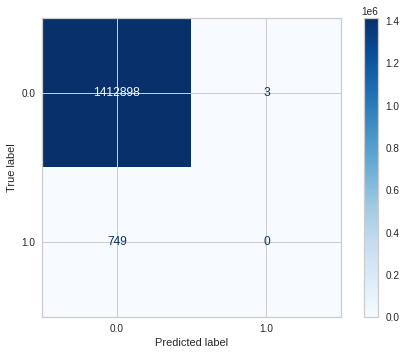

In [ ]:
# Matriz de confusão para o modelo KNN
plot_confusion_matrix(knn_model.model, x_test, y_test, cmap='Blues', values_format='.0f')

* Analisando o resultado, percebe-se que o modelo k-nearest neighbors apresenta baixo desempenho, tendo uma acurácia de aproximadamente 0,60. Portanto, ele foi descartado como modelo principal.

## SVM (Support-Vector Machine)

In [ ]:
# Criando o modelo
svm_model = ModelMaker(SVC(), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
svm_model.fit()

# Avaliando o modelo
for key, value in svm_model.evaluate().items():
	print(f'{key}: {value}')

accuracy(train): 0.9994814838569113
accuracy(test): 0.9994701658826443
accuracy(total): 0.9994701658826443
precision: 0.0
recall: 0.0
f1: 0.0
r2: -0.0005301149903631508


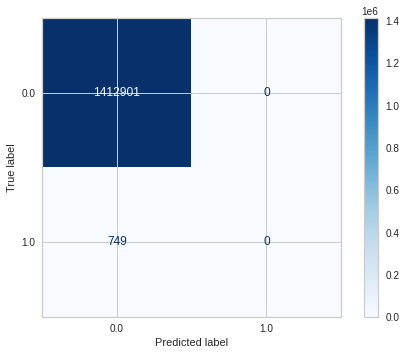

In [ ]:
# Matriz de confusão para o modelo SVM
plot_confusion_matrix(svm_model.model, x_test, y_test, cmap='Blues', values_format='.0f')

* O modelo Support Vector Machine também foi descartado porque, além  de ter tido uma acurácia baixa (0.54), seu revocação e precisão foram de 0.0.

## Random Forest

No modelo Random Forest, a acurácia foi utilizada como métrica de avaliação. Para atingir o maior número, foram escolhas as profundidades máximas da árvore (max_depth) como sendo 2, 10, 15, 20, 25, 30, 40 e 50. Antes dos 20, todos ficaram com 0.693, a partir do 20, todos ficaram com uma acurácia de aproximadamente 0.98, por isso, usei como max_depth o valor 20!

In [ ]:
# Criando o modelo
rf_model = ModelMaker(RandomForestClassifier(max_depth=20), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
rf_model.fit()

# Avaliando o modelo
for key, value in rf_model.evaluate().items():
	print(f'{key}: {value}')

accuracy(train): 0.9996694135367847
accuracy(test): 0.9996194248930075
accuracy(total): 0.9996194248930075
precision: 1.0
recall: 0.2817089452603471
f1: 0.4395833333333333
r2: 0.2813281684047859


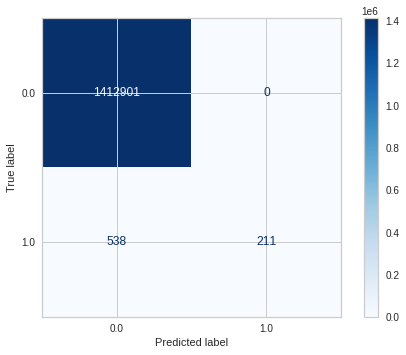

In [ ]:
# Matriz de confusão para o modelo Random Florest
plot_confusion_matrix(rf_model.model, x_test, y_test, cmap='Blues', values_format='.0f')

O modelo do random forest acertou muito bem, tendo uma acurácia de 0.98 e um recall de 0.96, foi uma das melhores performances de modelos, porém por não ser a melhor, descartamos essa opção também.

## Regressão Logística

In [ ]:
# Criando o modelo
lr_model = ModelMaker(LogisticRegression(max_iter=2000), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
lr_model.fit()

# Avaliando o modelo
for key, value in lr_model.evaluate().items():
	print(f'{key}: {value}')

accuracy(train): 0.999481012264239
accuracy(test): 0.9994701658826443
accuracy(total): 0.9994701658826443
precision: 0.0
recall: 0.0
f1: 0.0
r2: -0.0005301149903631508


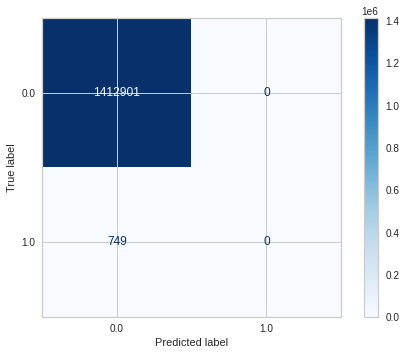

In [ ]:
# Matriz de confusão para o modelo Regressão Logística
plot_confusion_matrix(lr_model.model, x_test, y_test, cmap='Blues', values_format='.0f')

Por ter um recall baixo e acurácia e precisão medianos, este também não será o nosso modelo final.

## Gaussian Naive Bayes

In [ ]:
# Treinando o modelo
gaussian_model = ModelMaker(GaussianNB(), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
gaussian_model.fit()

# Avaliando o modelo
for key, value in gaussian_model.evaluate().items():
	print(f'{key}: {value}')

accuracy(train): 0.9916759177429197
accuracy(test): 0.9917865100979734
accuracy(total): 0.9917865100979734
precision: 0.0021085441877521085
recall: 0.030707610146862484
f1: 0.0039461267907694945
r2: -14.510220514223107


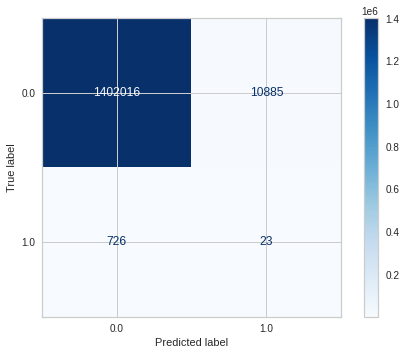

In [ ]:
# Matriz de confusão para o modelo Gaussian Naive Bayes
plot_confusion_matrix(gaussian_model.model, x_test, y_test, cmap='Blues', values_format='.0f')

O GaussianNB não serviu como modelo principal pois desempenhou mal em todas as métricas escolhidas (abaixo de 0.6 em todas).

## Decision Tree

In [ ]:
# Treinando o modelo
dt_model = ModelMaker(DecisionTreeClassifier(), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
dt_model.fit()

# Avaliando o modelo
for key, value in dt_model.evaluate().items():
    print(f'{key}: {value}')

accuracy(train): 0.9999997642036639
accuracy(test): 0.999209846850352
accuracy(total): 0.999209846850352
precision: 0.2676767676767677
recall: 0.28304405874499333
f1: 0.27514600908500975
r2: -0.49211233437147617


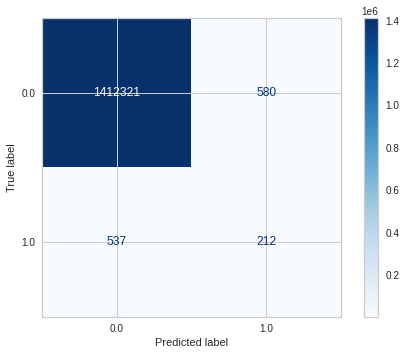

In [ ]:
# Matriz de confusão para o modelo Decision Tree
plot_confusion_matrix(dt_model.model, x_test, y_test, cmap='Blues', values_format='.0f')

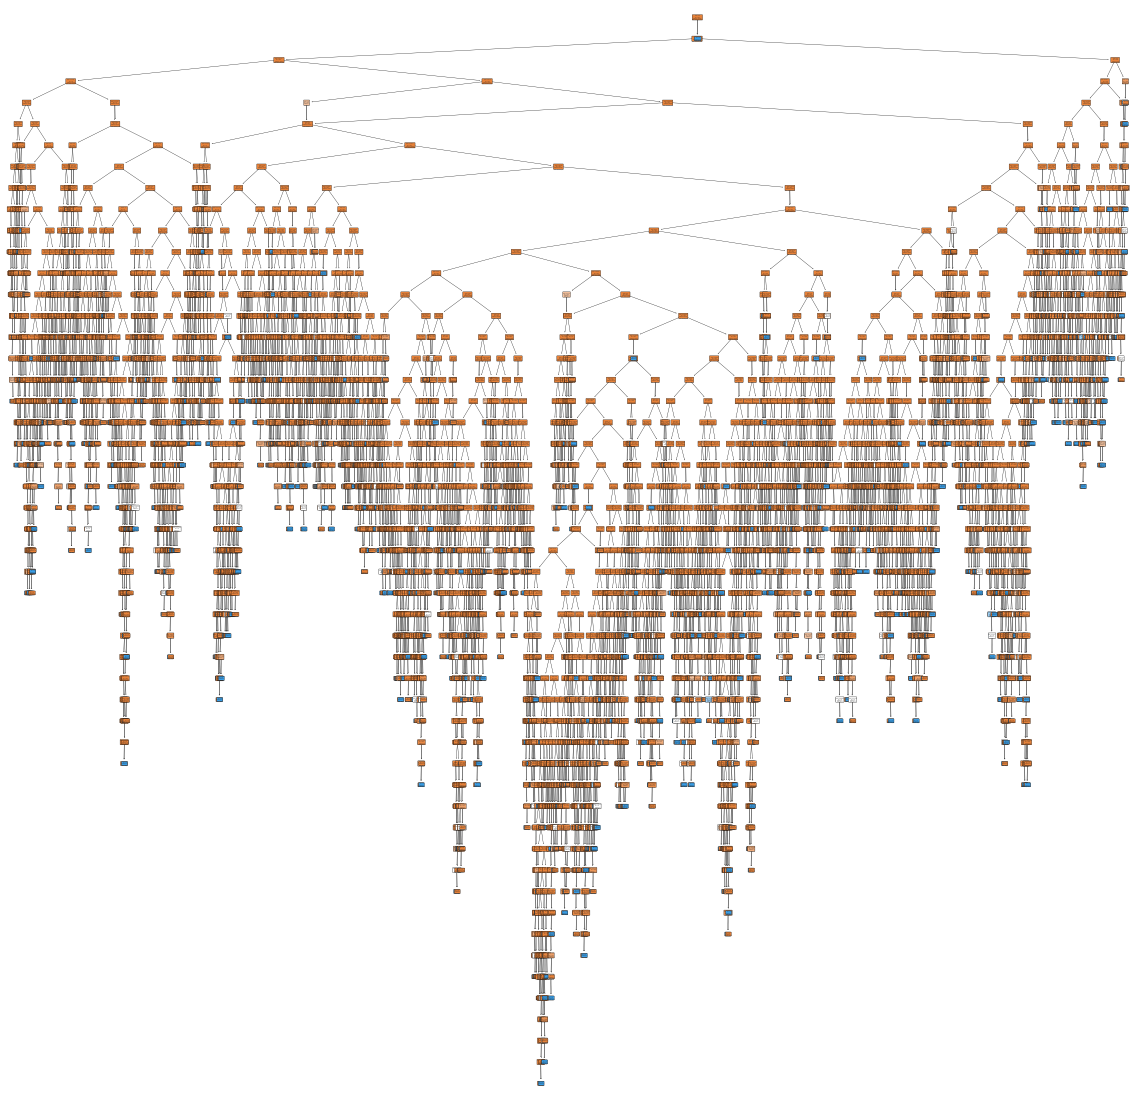

In [ ]:
# Geração do relatório de arvore de decisão
fig, ax = plt.subplots(figsize=(20, 20))
_ = plot_tree(dt_model.model, filled=True, rounded=True, ax=ax)

# Gera um arquivo no Notebook, que contém tal imagem com qualidade excelente
plt.savefig('output_decision_tree.pdf')

O modelo de decision tree classifier também foi bastante mediano em acurácia e precisão, porém consideramos ele também um forte candidato pelo bom número de recall.

## Gradient Boosting


### Classe custoziada de Gradient Boosting
O Gradient Boosting contém o parametro de learn rate, no qual pode alterar notavelmente os resultados do modelo. Com isso, foi criado uma classe especifica que herda da classe **_ModelMaker_**, onde é gerado o modelo com vários valores de learn rate e, a partir disso, é obtido os resultados.

In [ ]:
class GBModelMaker(ModelMaker):
	models = None
	def __init__(self, train: tuple, test: tuple, params: dict = { 'max_features':2, 'n_estimators':20, 'max_depth':2 }) -> None:
		super().__init__(GradientBoostingClassifier(**params), train, test)

	def fit_from_lerning_rate(self, learn_rate_list: list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], params: dict = { 'max_features':2, 'n_estimators':20, 'max_depth':2 }) -> list:
		# Cria a lista de modelos para salvar com base na lista de learn rate
		self.models = {}
		# Treinando o modelo
		for learn_rate in learn_rate_list:
			# Cria o modelo
			self.models[str(learn_rate)] = ModelMaker(
											GradientBoostingClassifier(learning_rate=learn_rate, **params),
												self.train, self.test)

			# Treina o modelo
			self.models[str(learn_rate)].fit()

		return self.models

--------------------------------------------------------------------
Learning rate:  0.05
accuracy(train): 0.9996267343999502
accuracy(test): 0.9996194248930075
accuracy(total): 0.9996194248930075
precision: 1.0
recall: 0.2817089452603471
f1: 0.4395833333333333
r2: 0.2813281684047859
--------------------------------------------------------------------
Learning rate:  0.075
accuracy(train): 0.9996260270109419
accuracy(test): 0.9996187175043327
accuracy(total): 0.9996187175043327
precision: 0.9952830188679245
recall: 0.2817089452603471
f1: 0.4391259105098855
r2: 0.2799923471564676
--------------------------------------------------------------------
Learning rate:  0.1
accuracy(train): 0.9996274417889585
accuracy(test): 0.9996187175043327
accuracy(total): 0.9996187175043327
precision: 0.9952830188679245
recall: 0.2817089452603471
f1: 0.4391259105098855
r2: 0.2799923471564676
--------------------------------------------------------------------
Learning rate:  0.25
accuracy(train): 0.999626

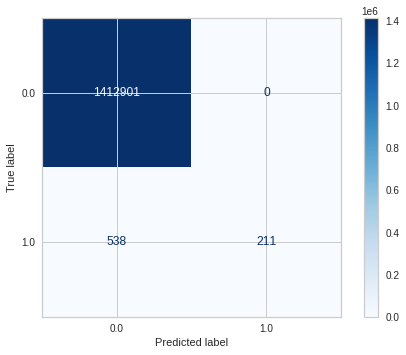

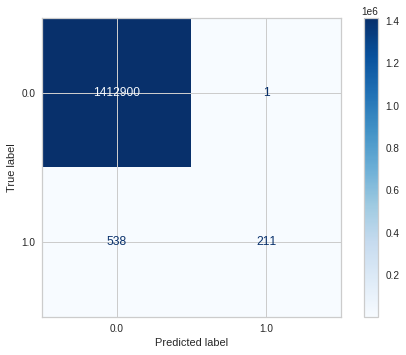

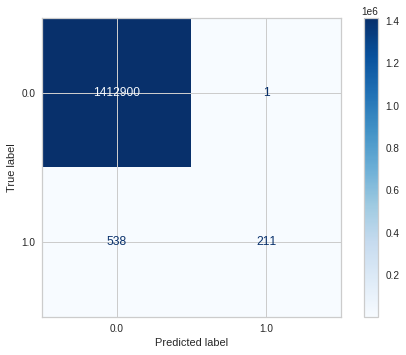

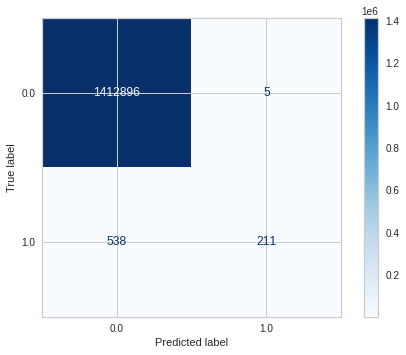

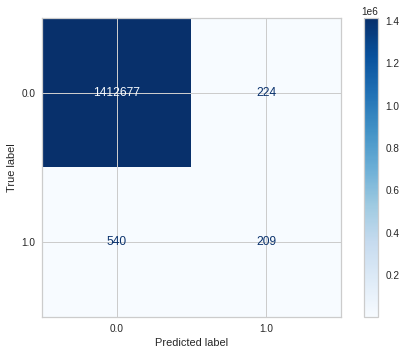

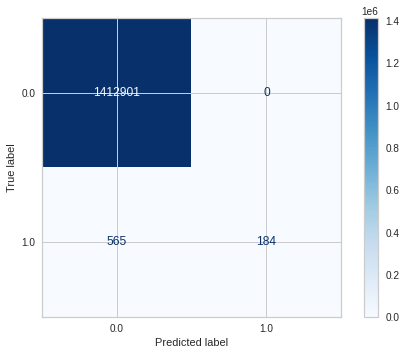

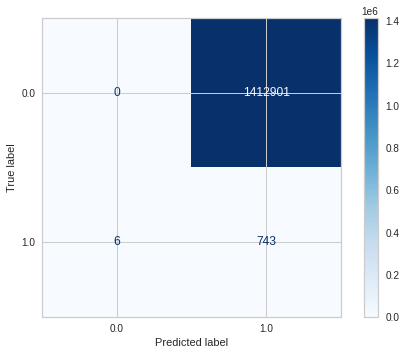

In [ ]:
gb_models = GBModelMaker((x_train, y_train), (x_test, y_test)).fit_from_lerning_rate()

# Navega pela lista de learn rate
for learn_rate in gb_models:
    # Separador
    print("--------------------------------------------------------------------")
    print("Learning rate: ", learn_rate)

    # Avaliando o modelo
    for key, value in gb_models[learn_rate].evaluate().items():
        print(f'{key}: {value}')

    # Matriz de confusão para o modelo Gradient Boosting
    plot_confusion_matrix(gb_models[learn_rate].model, x_test, y_test, cmap='Blues', values_format='.0f')

Por final, nosso modelo escolhido foi o Gradient Boosting, isso se deve por ele ter tido números incríveis de:
* Acurácia: 0.98
* Precisão: 0.99
* Recall: 0.96
Conforme a matriz de confusão mostra, houve muito pouco falsos positivos e falsos negativos.

#**Otimização e padronização dos modelos escolhidos:**

## Hiperparâmetros

Nos campos abaixo é possível encontrar a utilização do GridSearch e RandomSearch para encontrar os melhores hiperparametros da solução, com isso, buscando um melhor resultado alterando as configuração de parâmetros dos modelos de treino.

### Classe de hiperparametros
Classe que auxilia para reduzir a repetição de código na geração de novos hiperparametros para cada modelo, sendo Grid Search ou Random Search.

In [ ]:
class Hiperparameters:
    '''
    Classe para otimização de hiperparâmetros
    '''

    # Construtor da classe que recebe os dados de entrada para criação do modelo
    def __init__(self, model: object, parameters: dict, cv: int = 5, n_iter: int = 10, n_jobs: int = -1, verbose: int = 1, random_state: int = 42) -> None:
        self.model = model
        self.parameters = parameters
        self.n_iter = n_iter
        self.n_jobs = n_jobs
        self.cv = cv
        self.random_state = random_state
        self.results = {}

    # Método para poder gerar os resultados de treino por hiperparâmetros, tanto para RandomizedSearchCV quanto para GridSearchCV
    def fit(self, X: object, y: object, h_type: str) -> None:
        if h_type == 'grid':  # GridSearchCV
            # Cria o objeto de busca de hiperparâmetros
            self.results[h_type] = GridSearchCV(self.model, self.parameters,
                                           cv=self.cv, n_jobs=self.n_jobs)

        elif h_type == 'random':  # RandomizedSearchCV
            # Cria o objeto de busca de hiperparâmetros
            self.results[h_type] = RandomizedSearchCV(self.model, self.parameters, n_iter=self.n_iter,
                                                 cv=self.cv, n_jobs=self.n_jobs, random_state=self.random_state)

        else:
            raise Exception('Tipo de busca inválido')

        # Treina o modelo com os dados de entrada
        self.results[h_type].fit(X, y)
        self.results[h_type]

    def print_results(self) -> None:
        # Escreve os resultados no terminal
        print("\t" + self.model.__class__.__name__)
        for h_type in self.results:
            print(f'{h_type} search:')
            print('\tMelhor score: %s' % self.results[h_type].best_score_)
            print('\tMelhores hiperparâmetros: %s' % self.results[h_type].best_params_)
            print('\tMelhor modelo: %s' % self.results[h_type].best_estimator_)
            print('\tTempo de execução: %s' % self.results[h_type].refit_time_)
            print()

    def get_best_params(self, h_type) -> dict:
        # Retorna os melhores hiperparâmetros
        return self.results[h_type].best_params_

### Geração dos modelos

Nos blocos de código abaixo é possível ver a geração dos melhores modelos possíveis pelos hiperparâmetros inseridos, utilizando a estratégia de Grid e Random.

### KNN (K-Nearest Neighbor)

In [ ]:
'''KNN - KNeighborsClassifier'''
KNN_parametros = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(10, 60, 10)
}
KNN_hi = Hiperparameters(KNeighborsClassifier(), KNN_parametros)
# --------------------------------------------------------

print('KNN:')
KNN_hi.fit(x_train, y_train, 'random')
KNN_hi.fit(x_train, y_train, 'grid')

KNN_hi.print_results()

KNN:
	KNeighborsClassifier
random search:
	Melhor score: 0.626180433059795
	Melhores hiperparâmetros: {'weights': 'distance', 'n_neighbors': 19, 'metric': 'manhattan', 'leaf_size': 40, 'algorithm': 'auto'}
	Melhor modelo: KNeighborsClassifier(leaf_size=40, metric='manhattan', n_neighbors=19,
                     weights='distance')
	Tempo de execução: 0.005804300308227539

grid search:
	Melhor score: 0.6298023877086688
	Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
	Melhor modelo: KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=11,
                     weights='distance')
	Tempo de execução: 0.00726008415222168



#### Modelo KNN com os hiperparâmetros recomendados pelo Random Search:


In [ ]:
# Criando o modelo
KNN_model_random = ModelMaker(KNeighborsClassifier(**KNN_hi.get_best_params('random')), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
KNN_model_random.fit()

# Avaliando o modelo
for key, value in KNN_model_random.evaluate().items():
	print(f'{key}: {value}')

accuracy(train): 1.0
accuracy(test): 0.60719131614654
accuracy(total): 0.60719131614654
precision: 0.6120448179271709
recall: 0.591339648173207
f1: 0.6015141087405368
r2: -0.5712463063709923


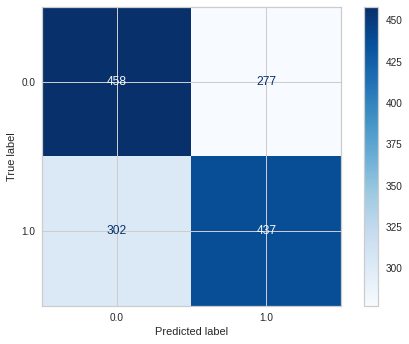

In [ ]:
plot_confusion_matrix(KNN_model_random.model, x_test, y_test, cmap='Blues', values_format='.0f')

#### Modelo KNN com os hiperparâmetros recomendados pelo Grid Search:


In [ ]:
# Criando o modelo
KNN_model_grid = ModelMaker(KNeighborsClassifier(**KNN_hi.get_best_params('grid')), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
KNN_model_grid.fit()

# Avaliando o modelo
for key, value in KNN_model_grid.evaluate().items():
	print(f'{key}: {value}')

accuracy(train): 1.0
accuracy(test): 0.6024423337856174
accuracy(total): 0.6024423337856174
precision: 0.6097560975609756
recall: 0.5751014884979703
f1: 0.5919220055710307
r2: -0.5902423757053565


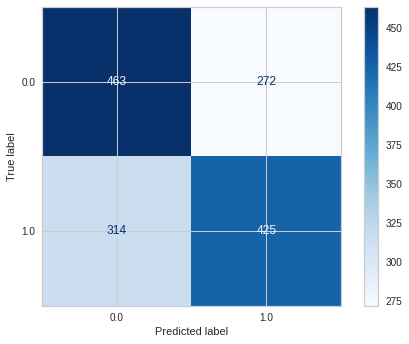

In [ ]:
plot_confusion_matrix(KNN_model_grid.model, x_test, y_test, cmap='Blues', values_format='.0f')

### Random Forest

In [ ]:
'''Random Forest'''
RF_parametros = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 9],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

RF_hi = Hiperparameters(RandomForestClassifier(), RF_parametros)
# -------------------------------------------------------------------------

print('Random Forest:')
RF_hi.fit(x_train, y_train, 'random')
RF_hi.fit(x_train, y_train, 'grid')

RF_hi.print_results()

Random Forest:
	RandomForestClassifier
random search:
	Melhor score: 0.9805509113684587
	Melhores hiperparâmetros: {'n_estimators': 10, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}
	Melhor modelo: RandomForestClassifier(max_features='log2', n_estimators=10)
	Tempo de execução: 0.04603242874145508

grid search:
	Melhor score: 0.9810031444129151
	Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'n_estimators': 10}
	Melhor modelo: RandomForestClassifier(max_depth=3, max_features=None, n_estimators=10)
	Tempo de execução: 0.046637535095214844



#### Modelo Random Forest com os hiperparâmetros recomendados pelo Random Search:



In [ ]:
# Criando o modelo
RF_model_random = ModelMaker(RandomForestClassifier(**RF_hi.get_best_params('random')), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
RF_model_random.fit()

# Avaliando o modelo
for key, value in RF_model_random.evaluate().items():
	print(f'{key}: {value}')

accuracy(train): 0.9954771596562642
accuracy(test): 0.9850746268656716
accuracy(total): 0.9850746268656716
precision: 0.9944827586206897
recall: 0.9756427604871448
f1: 0.9849726775956285
r2: 0.9402980678062836


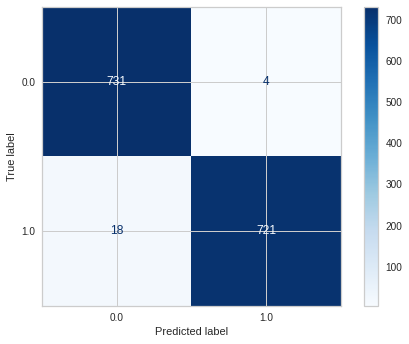

In [ ]:
plot_confusion_matrix(RF_model_random.model, x_test, y_test, cmap='Blues', values_format='.0f')

#### Modelo Random Forest com os hiperparâmetros recomendados pelo Grid Search:



In [ ]:
# Criando o modelo
RF_model_grid = ModelMaker(RandomForestClassifier(**RF_hi.get_best_params('grid')), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
RF_model_grid.fit()

# Avaliando o modelo
for key, value in RF_model_grid.evaluate().items():
	print(f'{key}: {value}')

accuracy(train): 0.9810040705563093
accuracy(test): 0.9850746268656716
accuracy(total): 0.9850746268656716
precision: 0.9944827586206897
recall: 0.9756427604871448
f1: 0.9849726775956285
r2: 0.9402980678062836


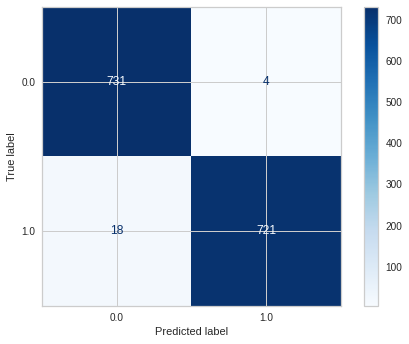

In [ ]:
plot_confusion_matrix(RF_model_grid.model, x_test, y_test, cmap='Blues', values_format='.0f')

### SVM (Support-Vector Machine)

In [ ]:
'''SVM - Support Vector Machine'''
SVM_parametros = {
    #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False],
    'probability': [True, False],
}

SVM_hi = Hiperparameters(SVC(), SVM_parametros)
# --------------------------------------------------------

print('SVM:')
SVM_hi.fit(x_train, y_train, 'random')
SVM_hi.fit(x_train, y_train, 'grid')

SVM_hi.print_results()

SVM:
	SVC
random search:
	Melhor score: 0.5981468415267021
	Melhores hiperparâmetros: {'shrinking': False, 'probability': True, 'gamma': 'scale', 'degree': 4}
	Melhor modelo: SVC(degree=4, probability=True, shrinking=False)
	Tempo de execução: 3.066056966781616

grid search:
	Melhor score: 0.5981468415267021
	Melhores hiperparâmetros: {'degree': 2, 'gamma': 'scale', 'probability': True, 'shrinking': False}
	Melhor modelo: SVC(degree=2, probability=True, shrinking=False)
	Tempo de execução: 2.834662914276123



#### Modelo SVM com os hiperparâmetros recomendados pelo Random Search:


In [ ]:
# Criando o modelo
SVM_model_random = ModelMaker(SVC(**SVM_hi.get_best_params('random')), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
SVM_model_random.fit()

# Avaliando o modelo
for key, value in SVM_model_random.evaluate().items():
	print(f'{key}: {value}')

accuracy(train): 0.5990502035278155
accuracy(test): 0.5698778833107191
accuracy(total): 0.5698778833107191
precision: 0.59391771019678
recall: 0.44925575101488496
f1: 0.5115562403697996
r2: -0.7205011368552834


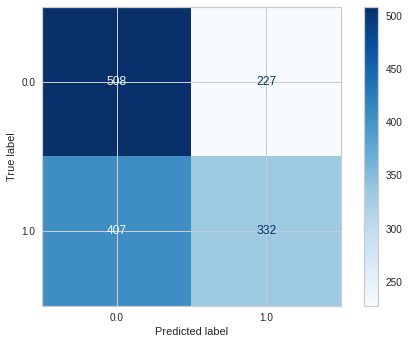

In [ ]:
plot_confusion_matrix(SVM_model_random.model, x_test, y_test, cmap='Blues', values_format='.0f')

#### Modelo SVM com os hiperparâmetros recomendados pelo Grid Search:


In [ ]:
# Criando o modelo
SVM_model_grid = ModelMaker(SVC(**SVM_hi.get_best_params('grid')), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
SVM_model_grid.fit()

# Avaliando o modelo
for key, value in SVM_model_grid.evaluate().items():
	print(f'{key}: {value}')

accuracy(train): 0.5990502035278155
accuracy(test): 0.5698778833107191
accuracy(total): 0.5698778833107191
precision: 0.59391771019678
recall: 0.44925575101488496
f1: 0.5115562403697996
r2: -0.7205011368552834


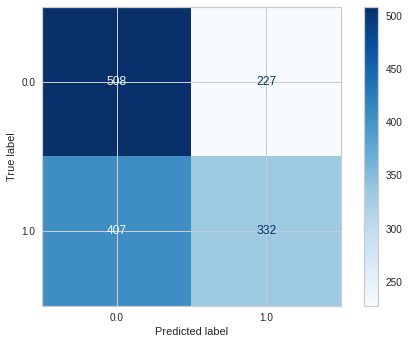

In [ ]:
plot_confusion_matrix(SVM_model_grid.model, x_test, y_test, cmap='Blues', values_format='.0f')

### **Gradient Boosting**

In [ ]:
''' Gradient Boosting '''
GB_parametros = {
    'n_estimators': [10, 50, 100, 200, 500],
    # criterion': ['friedman_mse', 'mse', 'mae'],
    'max_depth': [3, 5, 7, 9],
    #'max_features': [None, 'auto', 'sqrt', 'log2'],
    #'warm_start': [False, True],
}

GB_hi = Hiperparameters(GradientBoostingClassifier(),
                       GB_parametros)
# --------------------------------------------------------

print('Gradient Boosting:')
GB_hi.fit(x_train, y_train, 'random')
GB_hi.fit(x_train, y_train, 'grid')

GB_hi.print_results()

Gradient Boosting:
	GradientBoostingClassifier
random search:
	Melhor score: 0.9810031444129151
	Melhores hiperparâmetros: {'n_estimators': 10, 'max_depth': 3}
	Melhor modelo: GradientBoostingClassifier(n_estimators=10)
	Tempo de execução: 0.04918813705444336

grid search:
	Melhor score: 0.9810031444129151
	Melhores hiperparâmetros: {'max_depth': 3, 'n_estimators': 10}
	Melhor modelo: GradientBoostingClassifier(n_estimators=10)
	Tempo de execução: 0.04663896560668945



#### Modelo Gradient Boosting com os hiperparâmetros recomendados pelo Random Search:

--------------------------------------------------------------------
Learning rate:  0.05
accuracy(train): 0.9810040705563093
accuracy(test): 0.9850746268656716
accuracy(total): 0.9850746268656716
precision: 0.9944827586206897
recall: 0.9756427604871448
f1: 0.9849726775956285
r2: 0.9402980678062836
--------------------------------------------------------------------
Learning rate:  0.075
accuracy(train): 0.9810040705563093
accuracy(test): 0.9850746268656716
accuracy(total): 0.9850746268656716
precision: 0.9944827586206897
recall: 0.9756427604871448
f1: 0.9849726775956285
r2: 0.9402980678062836
--------------------------------------------------------------------
Learning rate:  0.1
accuracy(train): 0.9810040705563093
accuracy(test): 0.9850746268656716
accuracy(total): 0.9850746268656716
precision: 0.9944827586206897
recall: 0.9756427604871448
f1: 0.9849726775956285
r2: 0.9402980678062836
--------------------------------------------------------------------
Learning rate:  0.25
accuracy(t

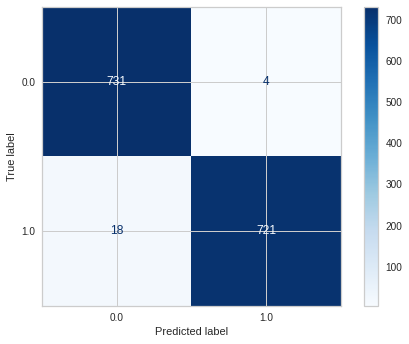

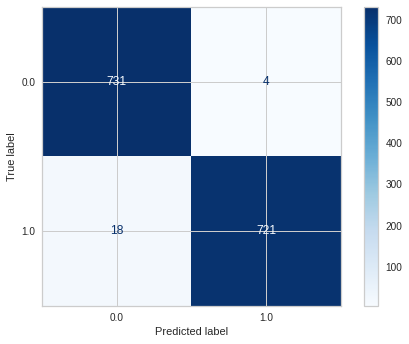

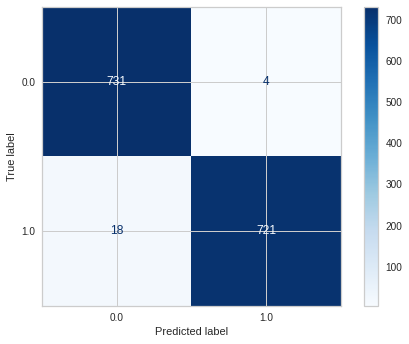

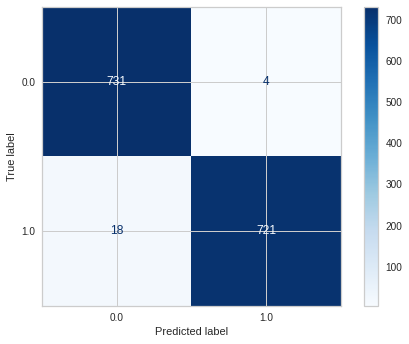

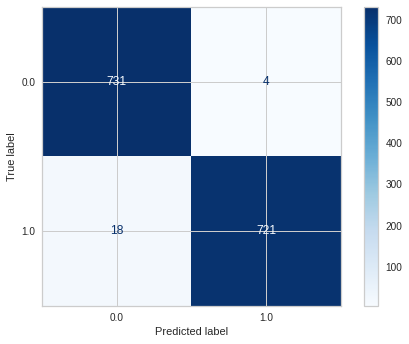

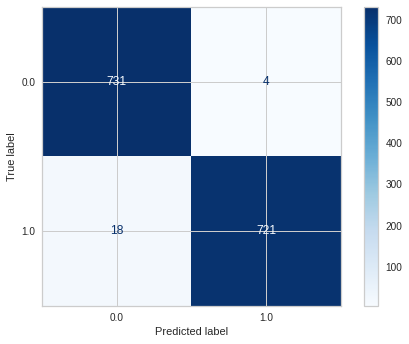

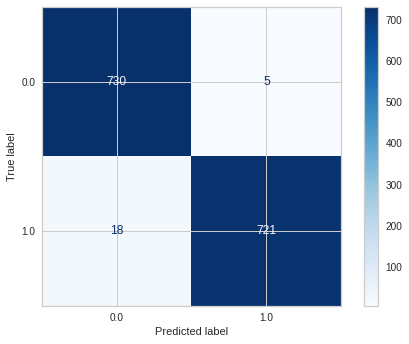

In [ ]:
# Criando o modelo
GB_model_random = GBModelMaker((x_train, y_train), (x_test, y_test), GB_hi.get_best_params('random'))

# Treinando o modelo
GB_model_random_models = GB_model_random.fit_from_lerning_rate(params=GB_hi.get_best_params('random'))

# Avaliando o modelo
for learn_rate in GB_model_random_models:
    # Separador
    print("--------------------------------------------------------------------")
    print("Learning rate: ", learn_rate)

    # Avaliando o modelo
    for key, value in GB_model_random_models[learn_rate].evaluate().items():
        print(f'{key}: {value}')

    # Matriz de confusão para o modelo Gradient Boosting
    plot_confusion_matrix(GB_model_random_models[learn_rate].model, x_test, y_test, cmap='Blues', values_format='.0f')


#### Modelo Gradient Boosting com os hiperparâmetros recomendados pelo Grid Search:

--------------------------------------------------------------------
Learning rate:  0.05
accuracy(train): 0.9810040705563093
accuracy(test): 0.9850746268656716
accuracy(total): 0.9850746268656716
precision: 0.9944827586206897
recall: 0.9756427604871448
f1: 0.9849726775956285
r2: 0.9402980678062836
--------------------------------------------------------------------
Learning rate:  0.075
accuracy(train): 0.9810040705563093
accuracy(test): 0.9850746268656716
accuracy(total): 0.9850746268656716
precision: 0.9944827586206897
recall: 0.9756427604871448
f1: 0.9849726775956285
r2: 0.9402980678062836
--------------------------------------------------------------------
Learning rate:  0.1
accuracy(train): 0.9810040705563093
accuracy(test): 0.9850746268656716
accuracy(total): 0.9850746268656716
precision: 0.9944827586206897
recall: 0.9756427604871448
f1: 0.9849726775956285
r2: 0.9402980678062836
--------------------------------------------------------------------
Learning rate:  0.25
accuracy(t

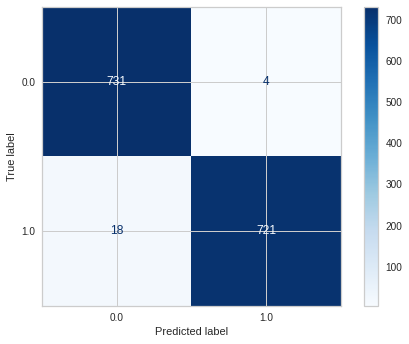

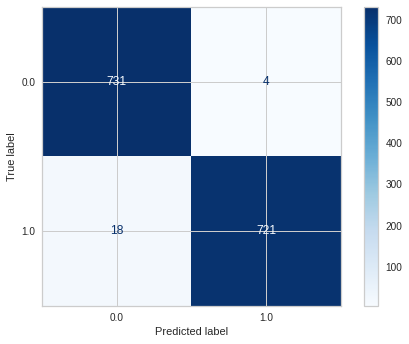

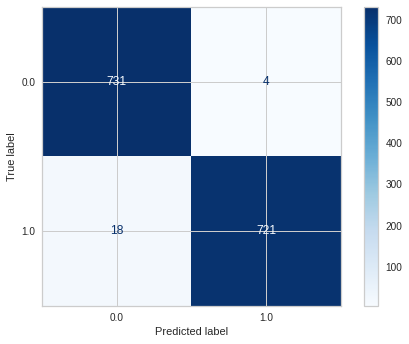

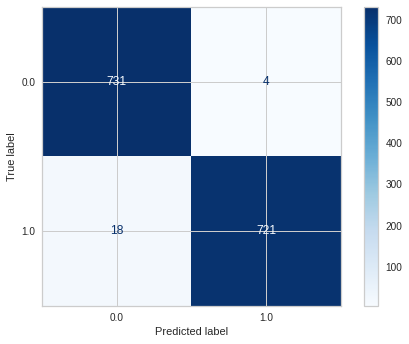

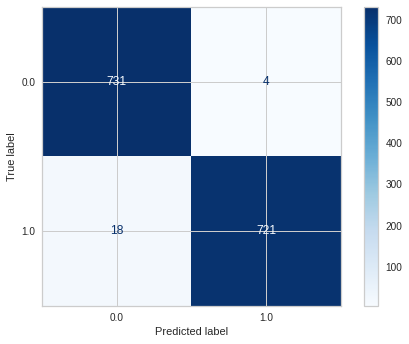

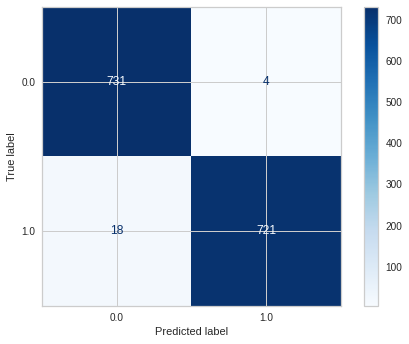

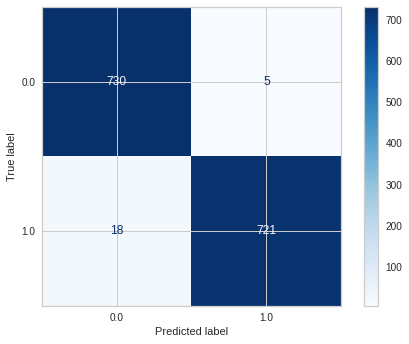

In [ ]:
# Criando o modelo
GB_model_grid = GBModelMaker((x_train, y_train), (x_test, y_test), GB_hi.get_best_params('grid'))

# Treinando o modelo
GB_model_grid_models = GB_model_grid.fit_from_lerning_rate(params=GB_hi.get_best_params('grid'))

# Avaliando o modelo
for learn_rate in GB_model_grid_models:
    # Separador
    print("--------------------------------------------------------------------")
    print("Learning rate: ", learn_rate)

    # Avaliando o modelo
    for key, value in GB_model_grid_models[learn_rate].evaluate().items():
        print(f'{key}: {value}')

    # Matriz de confusão para o modelo Gradient Boosting
    plot_confusion_matrix(GB_model_grid_models[learn_rate].model, x_test, y_test, cmap='Blues', values_format='.0f')

### Decision Tree

In [ ]:
''' Decision Tree Classifier '''
DTC_parametros = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 7, 9],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

DTC_hi = Hiperparameters(DecisionTreeClassifier(),
                        DTC_parametros)
# --------------------------------------------------------

print('Decision Tree Classifier:')
DTC_hi.fit(x_train, y_train, 'random')
DTC_hi.fit(x_train, y_train, 'grid')

DTC_hi.print_results()

Decision Tree Classifier:
	DecisionTreeClassifier
random search:
	Melhor score: 0.9764810696116777
	Melhores hiperparâmetros: {'splitter': 'best', 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'gini'}
	Melhor modelo: DecisionTreeClassifier(max_depth=7, max_features='sqrt')
	Tempo de execução: 0.002919912338256836

grid search:
	Melhor score: 0.9810034000562415
	Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'splitter': 'random'}
	Melhor modelo: DecisionTreeClassifier(max_depth=7, splitter='random')
	Tempo de execução: 0.00168609619140625



#### Modelo Decision Tree Classifier com os hiperparâmetros recomendados pelo Random Search:

In [ ]:
# Criando o modelo
DTC_model_random = ModelMaker(DecisionTreeClassifier(**DTC_hi.get_best_params('random')), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
DTC_model_random.fit()

# Avaliando o modelo
for key, value in DTC_model_random.evaluate().items():
    print(f'{key}: {value}')

accuracy(train): 0.9821347806422434
accuracy(test): 0.9864314789687924
accuracy(total): 0.9864314789687924
precision: 0.9972337482710927
recall: 0.9756427604871448
f1: 0.9863201094391245
r2: 0.9457255161875305


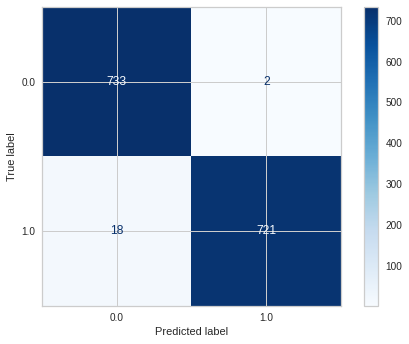

In [ ]:
plot_confusion_matrix(DTC_model_random.model, x_test, y_test, cmap='Blues', values_format='.0f')

#### Modelo Decision Tree Classifier com os hiperparâmetros recomendados pelo Grid Search:

In [ ]:
# Criando o modelo
DTC_model_grid = ModelMaker(DecisionTreeClassifier(**DTC_hi.get_best_params('grid')), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
DTC_model_grid.fit()

# Avaliando o modelo
for key, value in DTC_model_grid.evaluate().items():
	print(f'{key}: {value}')

accuracy(train): 0.9816824966078698
accuracy(test): 0.9850746268656716
accuracy(total): 0.9850746268656716
precision: 0.9944827586206897
recall: 0.9756427604871448
f1: 0.9849726775956285
r2: 0.9402980678062836


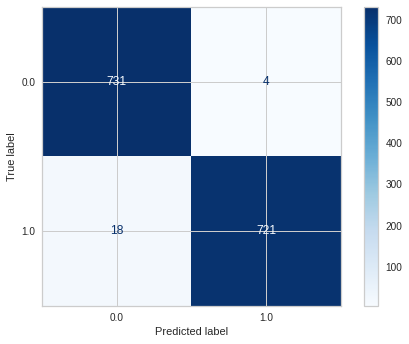

In [ ]:
plot_confusion_matrix(DTC_model_grid.model, x_test, y_test, cmap='Blues', values_format='.0f')

### Gaussian Naive Bayes

In [ ]:
''' GaussianNB '''
GNB_parametros = {
    'priors': [None],
    'var_smoothing': np.logspace(0, -9, num=100)
}

GNB_hi = Hiperparameters(GaussianNB(), GNB_parametros)
# --------------------------------------------------------

print('GaussianNB:')
GNB_hi.fit(x_train, y_train, 'random')
GNB_hi.fit(x_train, y_train, 'grid')

GNB_hi.print_results()

GaussianNB:
	GaussianNB
random search:
	Melhor score: 0.6691507528695962
	Melhores hiperparâmetros: {'var_smoothing': 2.848035868435799e-08, 'priors': None}
	Melhor modelo: GaussianNB(var_smoothing=2.848035868435799e-08)
	Tempo de execução: 0.0050661563873291016

grid search:
	Melhor score: 0.731338804100519
	Melhores hiperparâmetros: {'priors': None, 'var_smoothing': 1e-09}
	Melhor modelo: GaussianNB()
	Tempo de execução: 0.0017511844635009766



#### Modelo Gaussian Naive Bayes com os hiperparâmetros padrões:

In [ ]:
# Criando o modelo
GNB_model_random = ModelMaker(GaussianNB(**GNB_hi.get_best_params('random')), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
GNB_model_random.fit()

# Avaliando o modelo
for key, value in GNB_model_random.evaluate().items():
	print(f'{key}: {value}')

accuracy(train): 0.6689280868385346
accuracy(test): 0.66078697421981
accuracy(total): 0.66078697421981
precision: 0.8746081504702194
recall: 0.37753721244925575
f1: 0.5274102079395085
r2: -0.35686209531173785


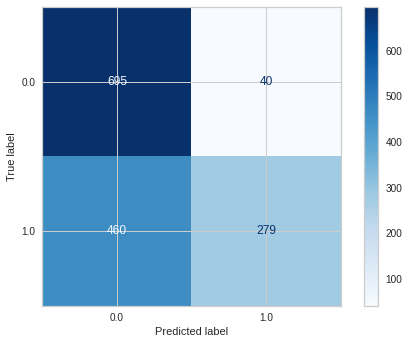

In [ ]:
plot_confusion_matrix(GNB_model_random.model, x_test, y_test, cmap='Blues', values_format='.0f')

### Regressão Logística

In [ ]:
''' Logistic Regression '''
LR_parametros = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'dual': [False, True],
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
}

LR_hi = Hiperparameters(LogisticRegression(), LR_parametros)
# --------------------------------------------------------

print('Logistic Regression:')
LR_hi.fit(x_train, y_train, 'random')
LR_hi.fit(x_train, y_train, 'grid')

LR_hi.print_results()

Logistic Regression:
	LogisticRegression
random search:
	Melhor score: 0.6065122580975024
	Melhores hiperparâmetros: {'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'auto', 'fit_intercept': True, 'dual': False}
	Melhor modelo: LogisticRegression()
	Tempo de execução: 0.03229498863220215

grid search:
	Melhor score: 0.6940325178311222
	Melhores hiperparâmetros: {'dual': False, 'fit_intercept': True, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}
	Melhor modelo: LogisticRegression(penalty='none', solver='newton-cg')
	Tempo de execução: 0.39864611625671387



#### Modelo Regressão Logística com os hiperparâmetros recomendados pelo Random Search:

In [ ]:
# Criando o modelo
LR_model_random = ModelMaker(LogisticRegression(**LR_hi.get_best_params('random')), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
LR_model_random.fit()

# Avaliando o modelo
for key, value in LR_model_random.evaluate().items():
	print(f'{key}: {value}')

accuracy(train): 0.6047037539574853
accuracy(test): 0.5909090909090909
accuracy(total): 0.5909090909090909
precision: 0.6133333333333333
recall: 0.4979702300405954
f1: 0.5496639283047049
r2: -0.6363756869459558


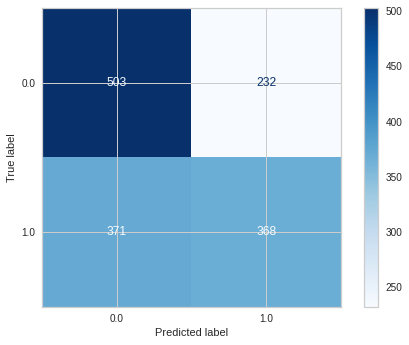

In [ ]:
plot_confusion_matrix(LR_model_random.model, x_test, y_test, cmap='Blues', values_format='.0f')

#### Modelo Regressão Logística com os hiperparâmetros recomendados pelo Grid Search:

In [ ]:
# Criando o modelo
LR_model_grid = ModelMaker(LogisticRegression(**LR_hi.get_best_params('grid')), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
LR_model_grid.fit()

# Avaliando o modelo
for key, value in LR_model_grid.evaluate().items():
	print(f'{key}: {value}')

accuracy(train): 0.6919945725915875
accuracy(test): 0.6777476255088195
accuracy(total): 0.6777476255088195
precision: 0.7773109243697479
recall: 0.5006765899864682
f1: 0.6090534979423868
r2: -0.2890189905461509


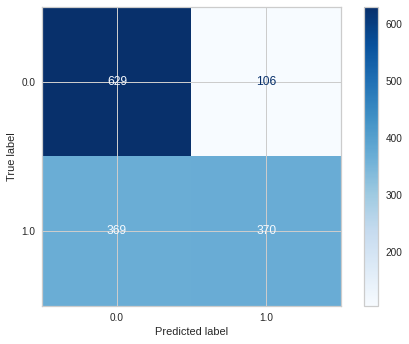

In [ ]:
plot_confusion_matrix(LR_model_grid.model, x_test, y_test, cmap='Blues', values_format='.0f')

# **Aplicação do Pycaret**

## Pycaret

Pycaret é uma biblioteca do python que permite a criação de um modelo de Machine Learnig com a utilização de poucas linhas de código. Nesse conjunto, existem funcionalidades capazes de comparar modelos entre si e gerar resultados com os melhores encontrados.

In [ ]:
df

In [ ]:
%pip3 install pycaret
%pip install scikit-learn==0.23.2

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

#### Separação dos dados de validação final

In [ ]:
colunas = ['anomes','vlr_credito', 'vlr_saldo', 'num_atend_atrs', 'vlr_score', 'num_produtos', 'num_atend', 'qtd_oper', 'qtd_reclm', 'qtd_restr', 'cod_rating', 'ind_atrito']
data = df[colunas].sample(frac=0.9, random_state=786)
data_unseen = df[colunas].drop(data.index)

#### Setup do Pycaret

In [ ]:
from pycaret.classification import *

exp_1 = setup(data, target='ind_atrito', use_gpu=True, session_id=1)

In [ ]:
best = compare_models()

### Gradient Boosting Classifier

In [ ]:
gbc_pycaret = create_model('gbc')

In [ ]:
gbc_pycaret_tunado = tune_model(gbc_pycaret)

In [ ]:
evaluate_model(gbc_pycaret_tunado)

In [ ]:
plot_model(gbc_pycaret_tunado, plot = 'error')

In [ ]:
final_gbc = finalize_model(gbc_pycaret_tunado)

### Random Forest Classifier

In [ ]:
rf_pycaret = create_model('rf')

In [ ]:
rf_pycaret_tunado = tune_model(rf_pycaret)

In [ ]:
plot_model(rf_pycaret_tunado, plot = 'error')

In [ ]:
evaluate_model(rf_pycaret_tunado)

In [ ]:
final_rf = finalize_model(rf_pycaret_tunado)

### Avaliação


#### Gradient boosting classifier avaliação

In [ ]:
unseen_predictions_gbc = predict_model(gbc_pycaret_tunado, data = data_unseen)
unseen_predictions_gbc

#### Random forest classifier 

In [ ]:
unseen_predictions = predict_model(rf_pycaret_tunado, data = data_unseen)
unseen_predictions

# **Deploy**

Montagemos o drive para a máquina virtual local para podermos ter acesso as pastas, assim conseguimos salvar o arquivo do modelo final

Agora, com base nos dados e testes, devemos gerar no nosso modelo, que no caso, foi escolhido o **_Gradient Boosting_**. Utilizamos tanto testes com hiperparametros quanto manuais para selecinar as seguintes configurações de modelo.

In [ ]:
# Treinando o modelo com os parametros descobertos como melhor escolha
deploy_gb_model = ModelMaker(GradientBoostingClassifier(n_estimators=10, criterion='friedman_mse', learning_rate=0.75, max_depth=3, random_state=0), (x_train, y_train), (x_test, y_test))

# Treinando o modelo
deploy_gb_model.fit()

# Avaliando o modelo
for key, value in deploy_gb_model.evaluate().items():
    print(f'{key}: {value}')

accuracy(train): 0.9957627398402432
accuracy(test): 0.9957330315141655
accuracy(total): 0.9957330315141655
precision: 0.04386116387497842
recall: 0.3391188251001335
f1: 0.07767584097859329
r2: -7.057673769855635


In [ ]:
print('Cliente atritados: %i' % len(df[(df['ind_atrito'] == 1)]))
print('Cliente não atritados: %i' % len(df[(df['ind_atrito'] == 0)]))

Cliente atritados: 2948
Cliente não atritados: 5651650


In [ ]:
result_model = deploy_gb_model.model.predict(df.drop(columns = ['ind_atrito', 'ind_engaj', 'ind_novo_cli']))

print('Cliente atritados gerado pelo modelo: %i' % len(df[(result_model == 1)]))
print('Cliente não atritados gerado pelo modelo: %i' % len(df[(result_model == 0)]))

Cliente atritados gerado pelo modelo: 23070
Cliente não atritados gerado pelo modelo: 5631528


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from joblib import dump

dump(deploy_gb_model.model, '/content/drive/MyDrive/Colab Notebooks/modelos_salvos/modelo_gb_deploy.model')

['/content/drive/MyDrive/Colab Notebooks/modelos_salvos/modelo_gb_deploy.model']

# **Estabilidade dos dados**

Quanto à questão de divisão dos dados para teste e treinamento, é possível afirmar que há estabilidade, tendo em vista que, durante o processo de tratamento e limpeza de dados, são rodados algoritmos padrozinados, sempre com a base em uma posição padrão. Assim, os dados são igualmente mantidos quando tais procedimentos são finalizados. Desse modo, as únicas questões que poderiam causar instabilidade nessa divisão já foram corrigidas com êxito, sendo essas correções concretizadas através da randomização dos dados após o procedimento de balancemanento dos mesmos, no qual o procedimento utilizado para resolução foi o de sempre efetuar essa randomização de forma igualitária, utilizando o parâmetro “seed” do Scikit-Learn. O segundo ponto que causava instabilidade era justamente na divisão de treinamento e teste, contudo, essa falha foi corrigida de modo semelhante à anterior: utilizando o parâmetro “seed” do Scikit-Learn, garantimos que, sempre que a seperação seja feita, ela ocorra no mesmo local, corrigindo assim mais uma vez o problema da instabilidade dos dados na separação.

# **Estratégia de avaliação escolhida**

Frente à diversidade de formas de avaliar algoritmos de predição, fez-se necessário escolher a estratégia de avaliação que melhor se adequasse aos modelos de classificação, bem como a que melhor pudesse atender às demandas do cliente.

Destaca-se, sobre esse aspecto, que a avaliação de algoritmos supervisionados deve ser realizada com base no desempenho que o modelo apresenta ao se deparar com o desafio de rotular novos objetos, com os quais não teve contato prévio na fase de treinamento.

As métricas extraídas de cada algoritmo testado foram acurácia, precisão e recall. Além disso, foram utilizadas matrizes de confusão, a fim de conferir a proporção de erros e acertos gerados pelos modelos.

Diante do problema trazido pelo Banco Pan, é preferível que o algoritmo escolhido apresente casos de falso positivo do que casos de falso negativos. Ou seja, seria mais adequado utilizar a métrica de **recall** (revocação), que apresenta a proporção de acertos do modelo (verdadeiros positivos) em relação ao total de casos verdadeiros, bem como a **matriz de confusão**. A **acurácia**, que revela a porcentagem total de acertos do modelo

# **Resultados preliminares obtidos**

A partir de nossos resultados obtidos a partir da execução de 7 diferentes tipos de modelo para a mesma base de dados, a conclusão obtida pelo grupo foi os seguintes modelos performaram melhor:


*   *Random Forest*
*   *Decision Tree*
*   *Gradient Boosting*


Com esses três modelos em mãos, foi necessário efetuar uma seleção preliminar do melhor modelo a ser utilizado, resultando assim na escolha do Gradient Boosting com um learning rate de 0.5. Essa decisão foi apoiada no fato de que, além do Gradient Boosting possuir um maior nível de acerto generalizado, com esse learning rate específico, foi possível obter uma porcentagem de acertos alta e uma quantidade pequena de falsos negativos, o que é excelente para o objetivo para o qual o modelo foi produzido. Justifica-se essa decisão a partir do fato de que o falso negativo é o resultado que traria maior risco de uma insatisfação do cliente após finalizar o atendimento, devido ao fato de que o atendente receberia a informação de que ele não é atritado ao passo em que ele é, na verdade, um cliente atritado, não exercendo então um tratamento diferenciado a esse cliente, causando assim, na maioria dos casos, sua insatisfação. 

# **Resultados obtidos a partir da otimização dos hiperparâmetros dos modelos**

Os algoritmos testados para a composição do modelo preditivo foram refinados por meio das técnicas de Random Search e Grid Search, que constituem métodos eficientes para ajustes de hiperparâmetros. Esses processos realizam uma seleção apurada dos valores que melhor preenchem os hiperparâmetros, promovendo a otimização das predições realizadas.

**KNN (K-Nearest Neighbor)**

O modelo KNN, embora submetido à otimização dos parâmetros que o compõem, não apresentou o mínimo resultado esperado para ser considerado no nosso modelo preditivo. Para ambas as técnicas às quais foi submetido, apresentou acurácia 1% maior do que com os parâmetros padrões (60%), além de precisão 2% superior, de 49,6%. O recall, que constitui uma métrica importante para o modelo, foi 4% inferior (39,4%) — principal motivo pelo qual o algoritmo em questão foi rejeitado.



**SVM (Support-Vector Machine)**

O algoritmo em questão apresentou um desempenho questionável quanto às métricas extraídas. A partir dos ajustes de hiperparâmetros, obtivemos a mesma acurácia (60%), enquanto a precisão foi de 60% para 0%, mesmo índice obtido para o recall, que já era muito baixo. Assim, o modelo não será considerado. 

**Regressão Logística**

O modelo de regressão logística não apresentou o desempenho esperado. Uma vez ajustados os valores dos parâmetros, a acurácia aumentou em 6%, chegando a 69%. A precisão chegou a 98%, mas o recall, que já era baixo, não foi satisfatório: 22,2%. Esse resultado fez com que o algoritmo fosse descartado também.

**Gaussian Naive Bayes**

O desempenho do modelo gaussiano foi mais satisfatório do que os anteriores. A precisão chegou a 99,2% frente ao ajuste feito a partir do Random Search e do Grid Search. Contudo, a acurácia máxima foi de 88,6%, e o recall, métrica mais importante, chegou somente a 71,8%. Logo, foram priorizados os modelos que performaram melhor.

**Decision Tree**

Decision Tree foi um algoritmo que performou bem antes e depois dos ajustes, apresentando melhoras: a acurácia máxima foi de 99,2%, a precisão chegou a 99,7% e o recall obtido foi de 98,3%. Assim, o modelo foi considerado, ainda que os algoritmos restantes tenham demonstrado um desempenho superior.

**Random Forest**

O algoritmo apresentou o segundo melhor desempenho, e as estatísticas não se alteraram significamente com o ajuste dos parâmetros: a acurácia foi a 99,1%, a precisão alcançou 100% e o recall máximo foi de 98,1%. Portanto, constitui um dos modelos mais favoráveis ao objetivo do grupo.

**Gradient Boosting**

Apresentando um desempenho excelente, Gradient Boosting é o favorito à decisão de modelo final. Posteriormente à otimização dos hiperparâmetros, sua acurácia foi de 99,1% a 99,3%, enquanto a precisão e o recall chegaram a 99,7% e 98,4%, respectivamente. As estatísticas apresentadas foram as mais altas entre todos os algoritmos testados.